**Author : Barkha Verma**

**Data Science and Business Analytics internship**

**The Sparks Foundation GRIP**

**Batch : December 2020**

**Task#5 Perform ‘Exploratory Data Analysis’ on dataset Indian Premier League**

**Objective :  As a sports analysts, find out the most successful teams, players and factors contributing win or loss of a team.**

**Suggest teams or players a company should endorse for its products.**

In [58]:
# Firstly we will import the important libraries required in this notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [59]:
# We will import our dataset
data = pd.read_csv("matches.csv")
# we will print first 5 line of our dataset
data.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [60]:
# we will import our second dataset
Data = pd.read_csv("deliveries.csv")
# we will print the first five line of our dataset
Data.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [61]:
# we will combine our both dataset
season_data=data[['id','season','winner']]

complete_data=Data.merge(season_data,how='inner',left_on='match_id',right_on='id')

In [62]:
# we will print name of columns present in our dataset
data.columns.values

array(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'], dtype=object)

In [63]:
# we will print shape of our dataset
data.shape

(756, 18)

from above we can say that there are 756 rows and 18 columns

In [64]:
# we will check if there is NAN value in our dataset
data.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

from above we can see that NAN value  is in all columns expect column umpire3 all columns has NAN value less then 7 so we will drop the umpire3 column.

In [65]:
# we will drop the umpire3 column
data = data.drop(columns=["umpire3"],axis=1)
# we will print head of our dataset
data.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN


In [66]:
# we will print info of our dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
dtypes: int64(5), object(12)
memory usag

In [67]:
# we will print summary of our dataset
data.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [68]:
# we will print teams with most no of wins per season
wins_per_season = data.groupby("season")["winner"].value_counts()
wins_per_season

season  winner                     
2008    Rajasthan Royals               13
        Kings XI Punjab                10
        Chennai Super Kings             9
        Delhi Daredevils                7
        Mumbai Indians                  7
                                       ..
2019    Kings XI Punjab                 6
        Kolkata Knight Riders           6
        Sunrisers Hyderabad             6
        Rajasthan Royals                5
        Royal Challengers Bangalore     5
Name: winner, Length: 100, dtype: int64

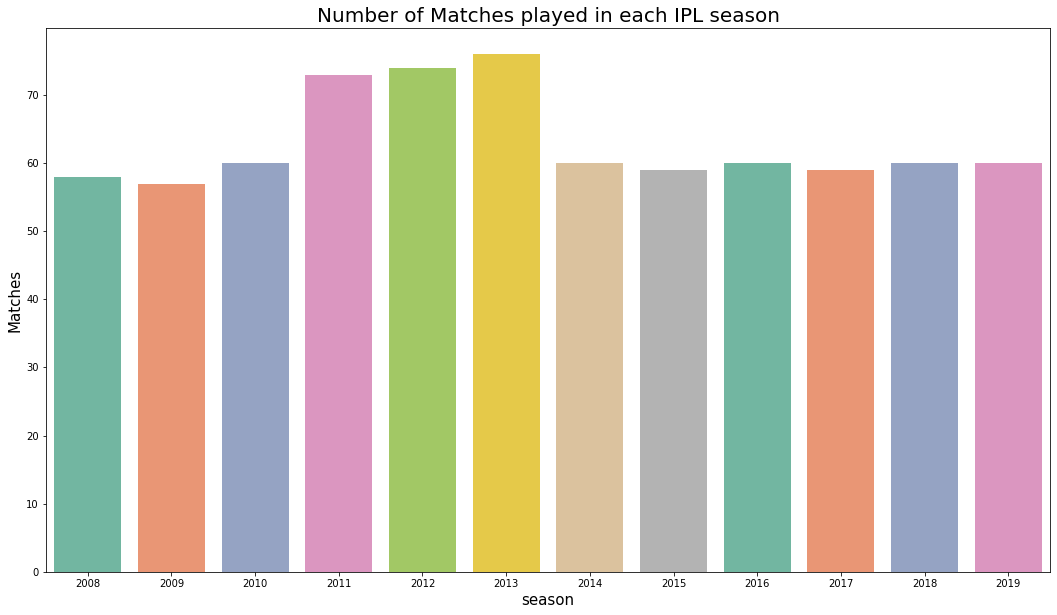

In [69]:
# we will plot graph Number of Matches played in each IPL season
plt.figure(figsize = (18,10))
sns.countplot('season',data=data,palette="Set2")
plt.title("Number of Matches played in each IPL season",fontsize=20)
plt.xlabel("season",fontsize=15)
plt.ylabel('Matches',fontsize=15)
plt.show()


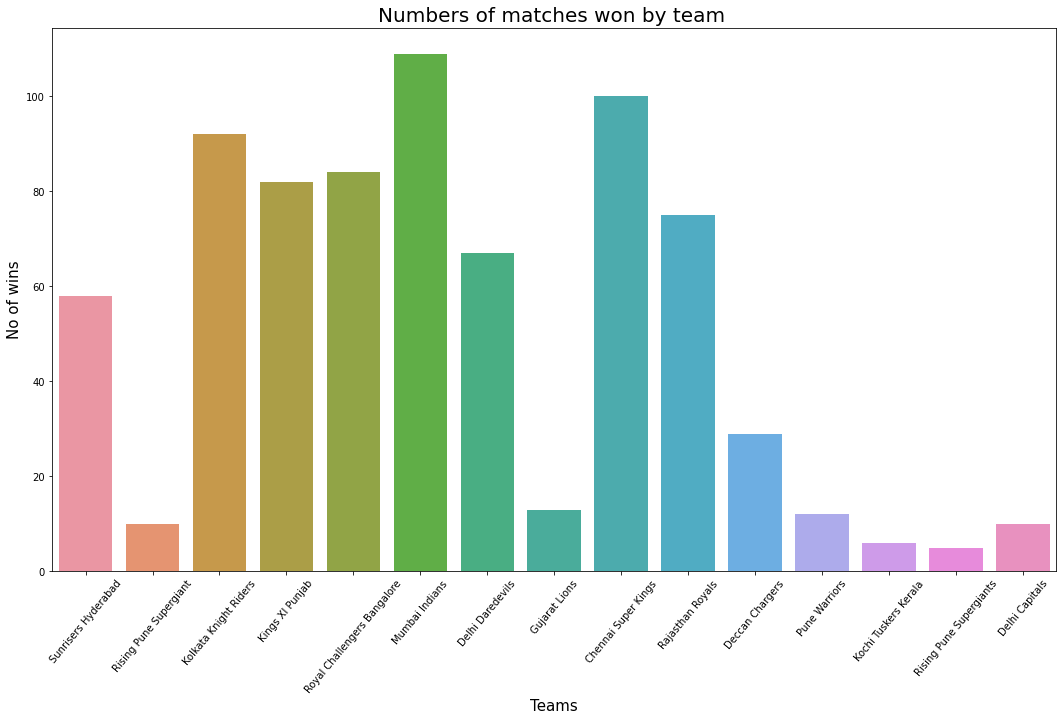

In [70]:
# we will plot graph on no of matches won by team
plt.figure(figsize = (18,10))
sns.countplot(x='winner',data=data)
plt.title("Numbers of matches won by team ",fontsize=20)
plt.xticks(rotation=50)
plt.xlabel("Teams",fontsize=15)
plt.ylabel("No of wins",fontsize=15)
plt.show()

from above we can see that Mumbai Indians won the highest number of matches

In [71]:
data['win_by']=np.where(data['win_by_runs']>0,'Bat first','Bowl first')

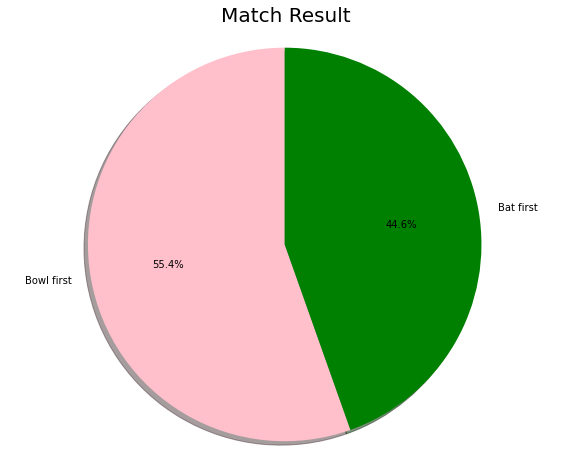

In [72]:
# we will plot pie chart on win percentage
Win=data.win_by.value_counts()
labels=np.array(Win.index)
sizes = Win.values
colors = ['pink', 'green']
plt.figure(figsize = (10,8))
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True,startangle=90)
plt.title('Match Result',fontsize=20)
plt.axis('equal',fontsize=10)
plt.show()


from above we can see that which team bowl first win more times then which team bat first

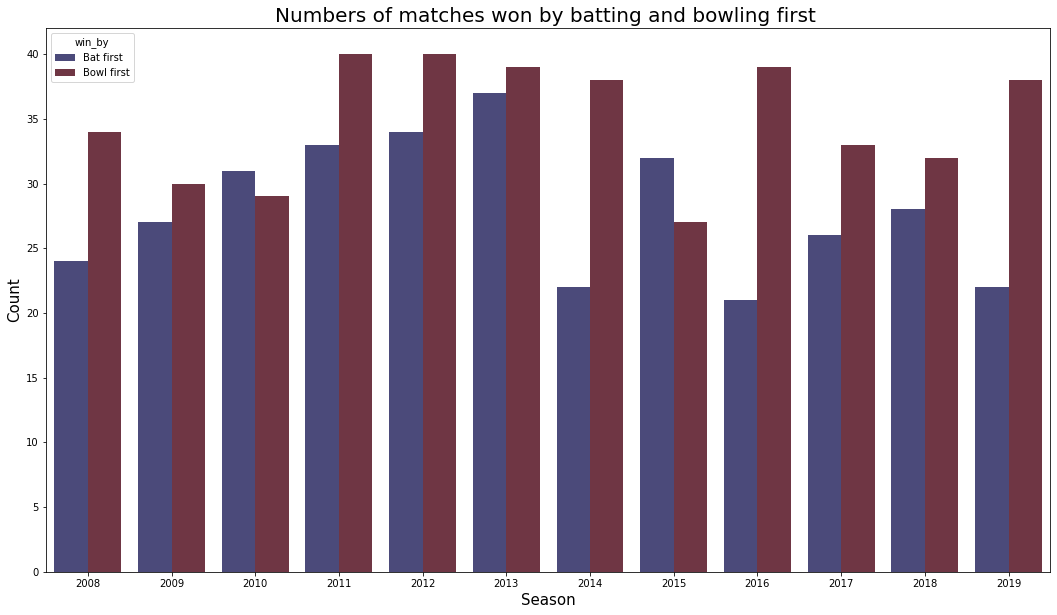

In [73]:
# we will plot graph on Numbers of matches won by batting and bowling first
plt.figure(figsize = (18,10))
sns.countplot('season',hue='win_by',data=data,palette='icefire')
plt.title("Numbers of matches won by batting and bowling first ",fontsize=20)
plt.xlabel("Season",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.show()


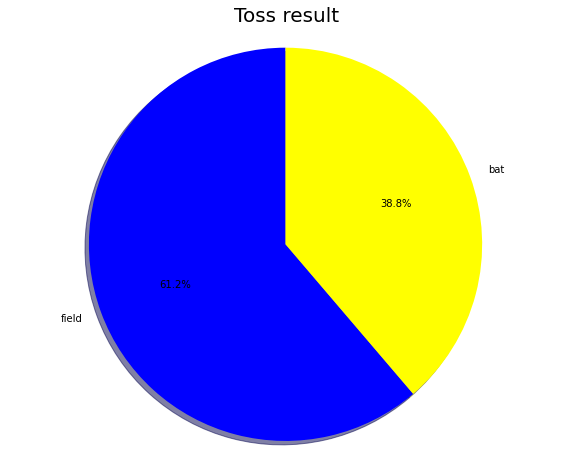

In [74]:
# we will plot pie chart on Toss decision
Toss=data.toss_decision.value_counts()
labels=np.array(Toss.index)
sizes = Toss.values
colors = ['blue', 'yellow']
plt.figure(figsize = (10,8))
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True,startangle=90)
plt.title('Toss result',fontsize=20)
plt.axis('equal',fontsize=10)
plt.show()


from above we can see that after winning toss more teams decide to do fielding first

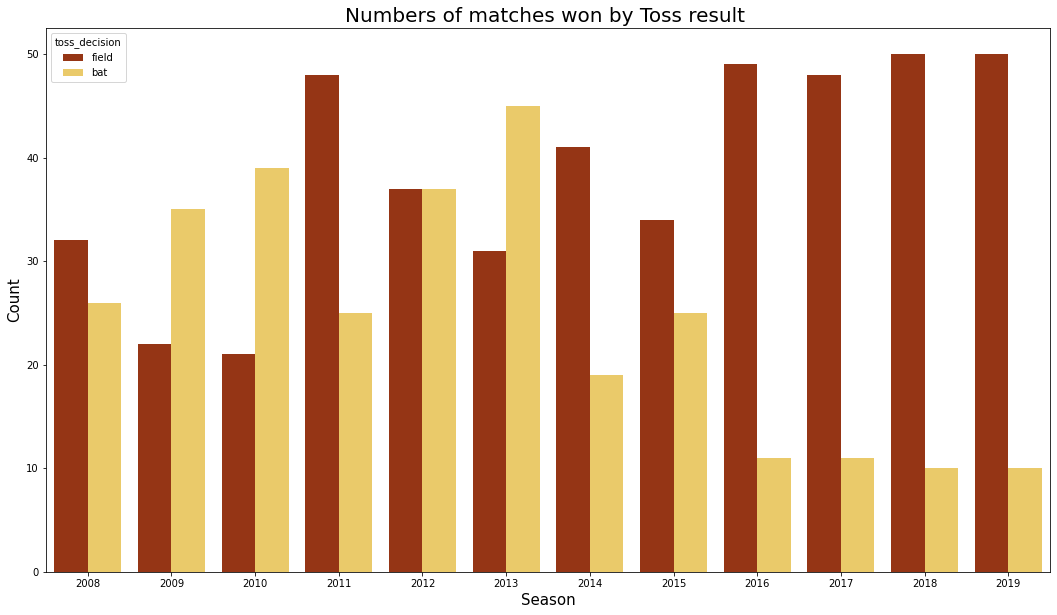

In [75]:
# we will plot graph on Numbers of matches won by Toss result
plt.figure(figsize = (18,10))
sns.countplot('season',hue='toss_decision',data=data,palette='afmhot')
plt.title("Numbers of matches won by Toss result ",fontsize=20)
plt.xlabel("Season",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.show()

In [76]:
# we will print winner season wise
final_matches=data.drop_duplicates(subset=['season'], keep='last')

final_matches[['season','winner']].reset_index(drop=True).sort_values('season')

,season,winner
1,2008,Rajasthan Royals
2,2009,Deccan Chargers
3,2010,Chennai Super Kings
4,2011,Chennai Super Kings
5,2012,Kolkata Knight Riders
6,2013,Mumbai Indians
7,2014,Kolkata Knight Riders
8,2015,Mumbai Indians
9,2016,Sunrisers Hyderabad
0,2017,Mumbai Indians


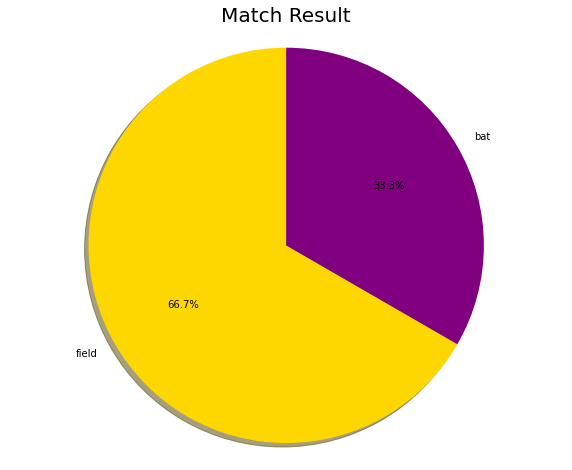

In [77]:
# we will plot pie chart on Winning percentage in final
match = final_matches.win_by.value_counts()
labels=np.array(Toss.index)
sizes = match.values
colors = ['gold', 'purple']
plt.figure(figsize = (10,8))
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True,startangle=90)
plt.title('Match Result',fontsize=20)
plt.axis('equal',fontsize=10)
plt.show()

From above we can see that in final team which field first won the match most.

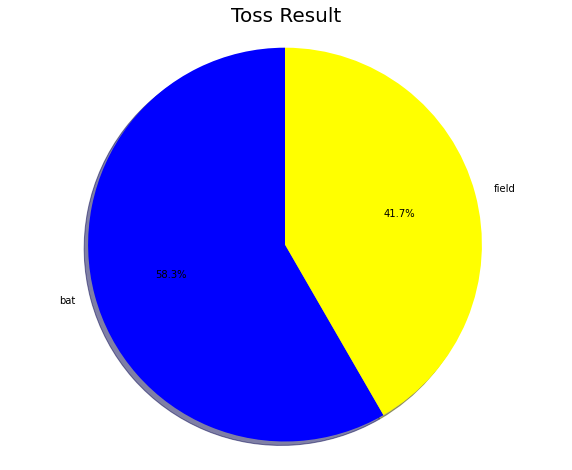

In [78]:
# we will plot pie chart on Toss decision on finals
Toss=final_matches.toss_decision.value_counts()
labels=np.array(Toss.index)
sizes = Toss.values
colors = ['blue', 'yellow']
plt.figure(figsize = (10,8))
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True,startangle=90)
plt.title('Toss Result',fontsize=20)
plt.axis('equal',fontsize=10)
plt.show()


from above we can see that in finals more team decide to bat first after winning the toss

<Figure size 1296x720 with 0 Axes>

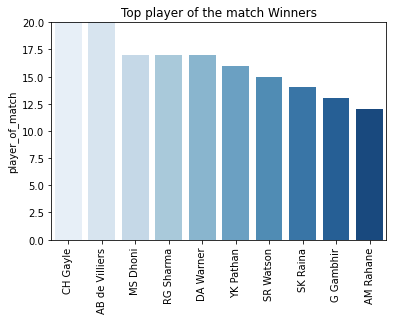

In [79]:
# we will print name of top player in IPL
plt.figure(figsize = (18,10))
top_players = data.player_of_match.value_counts()[:10]
fig, ax = plt.subplots()
ax.set_ylim([0,20])
ax.set_ylabel("Count")
ax.set_title("Top player of the match Winners")
top_players.plot.bar()
sns.barplot(x = top_players.index, y = top_players, orient='v', palette="Blues");
plt.show()


CH Gayle -Successful player in all match winners

In [80]:
# We will print IPL Finals venues and winners along with the number of wins.
final_matches.groupby(['city','winner']).size()

city          winner               
Bangalore     Kolkata Knight Riders    1
              Sunrisers Hyderabad      1
Chennai       Chennai Super Kings      1
              Kolkata Knight Riders    1
Hyderabad     Mumbai Indians           2
Johannesburg  Deccan Chargers          1
Kolkata       Mumbai Indians           2
Mumbai        Chennai Super Kings      2
              Rajasthan Royals         1
dtype: int64

In [81]:
# we will print number of season won by teams
final_matches["winner"].value_counts()

Mumbai Indians           4
Chennai Super Kings      3
Kolkata Knight Riders    2
Deccan Chargers          1
Rajasthan Royals         1
Sunrisers Hyderabad      1
Name: winner, dtype: int64

from above we can see that team Mumbai Indians won match in 4 season

In [82]:
# we will print toss winner, toss decision, winner in final matches.
final_matches[['toss_winner','toss_decision','winner']].reset_index(drop=True)

,toss_winner,toss_decision,winner
0,Mumbai Indians,bat,Mumbai Indians
1,Rajasthan Royals,field,Rajasthan Royals
2,Royal Challengers Bangalore,field,Deccan Chargers
3,Chennai Super Kings,bat,Chennai Super Kings
4,Chennai Super Kings,bat,Chennai Super Kings
5,Chennai Super Kings,bat,Kolkata Knight Riders
6,Mumbai Indians,bat,Mumbai Indians
7,Kolkata Knight Riders,field,Kolkata Knight Riders
8,Chennai Super Kings,field,Mumbai Indians
9,Sunrisers Hyderabad,bat,Sunrisers Hyderabad


In [83]:
# we will print man of the match
final_matches[['winner','player_of_match']].reset_index(drop=True)

,winner,player_of_match
0,Mumbai Indians,KH Pandya
1,Rajasthan Royals,YK Pathan
2,Deccan Chargers,A Kumble
3,Chennai Super Kings,SK Raina
4,Chennai Super Kings,M Vijay
5,Kolkata Knight Riders,MS Bisla
6,Mumbai Indians,KA Pollard
7,Kolkata Knight Riders,MK Pandey
8,Mumbai Indians,RG Sharma
9,Sunrisers Hyderabad,BCJ Cutting


It is interesting that out of 12 IPL finals,9 times the team that won the toss was also the winner of IPL


In [84]:
len(final_matches[final_matches['toss_winner']==final_matches['winner']]['winner'])

9

In [93]:
# we will print numbers of fours hit by team
four_data=complete_data[complete_data['batsman_runs']==4]
four_data.groupby('batting_team')['batsman_runs'].agg([('runs by fours','sum'),('fours','count')])

,runs by fours,fours
batting_team,,
Chennai Super Kings,8772,2193
Deccan Chargers,3828,957
Delhi Capitals,968,242
Delhi Daredevils,8632,2158
Gujarat Lions,1840,460
Kings XI Punjab,9832,2458
Kochi Tuskers Kerala,680,170
Kolkata Knight Riders,9736,2434
Mumbai Indians,10352,2588


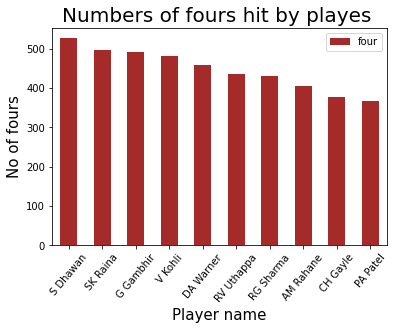

In [99]:
# we will plot graph on four hit by players
batsman_four=four_data.groupby('batsman')['batsman_runs'].agg([('four','count')]).reset_index().sort_values('four',ascending=0)
ax=batsman_four.iloc[:10,:].plot('batsman','four',kind='bar',color='brown')
plt.title("Numbers of fours hit by playes ",fontsize=20)
plt.xticks(rotation=50)
plt.xlabel("Player name",fontsize=15)
plt.ylabel("No of fours",fontsize=15)
plt.show()

from above we can say that higest four run is hitten by S Dhawan

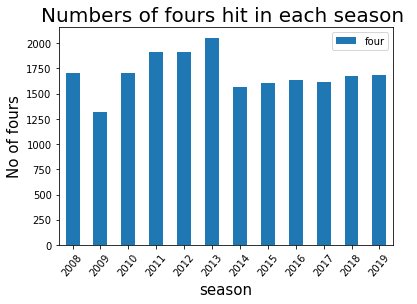

In [101]:
# we will plot graph on no of four hit in each season
ax=four_data.groupby('season')['batsman_runs'].agg([('four','count')]).reset_index().plot('season','four',kind='bar')
plt.title("Numbers of fours hit in each season ",fontsize=20)
plt.xticks(rotation=50)
plt.xlabel("season",fontsize=15)
plt.ylabel("No of fours",fontsize=15)
plt.show()

In [92]:
# we will print no of sixes hit by team
six_data=complete_data[complete_data['batsman_runs']==6]
six_data.groupby('batting_team')['batsman_runs'].agg([('runs by six','sum'),('sixes','count')])

,runs by six,sixes
batting_team,,
Chennai Super Kings,5838,973
Deccan Chargers,2400,400
Delhi Capitals,522,87
Delhi Daredevils,4806,801
Gujarat Lions,930,155
Kings XI Punjab,5856,976
Kochi Tuskers Kerala,318,53
Kolkata Knight Riders,5580,930
Mumbai Indians,6576,1096


from above we can see that in season 2013 highest four run hitten by players

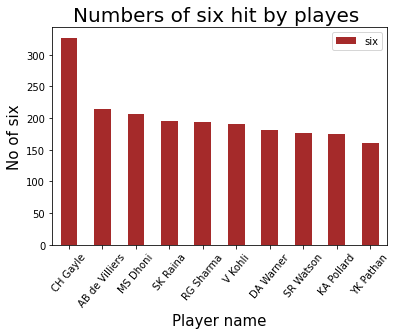

In [102]:
# we will plot graph of six hit by players
batsman_six=six_data.groupby('batsman')['batsman_runs'].agg([('six','count')]).reset_index().sort_values('six',ascending=0)
ax=batsman_six.iloc[:10,:].plot('batsman','six',kind='bar',color='brown')
plt.title("Numbers of six hit by playes ",fontsize=20)
plt.xticks(rotation=50)
plt.xlabel("Player name",fontsize=15)
plt.ylabel("No of six",fontsize=15)
plt.show()

from above we can see that CH Gayle hit highest number of six

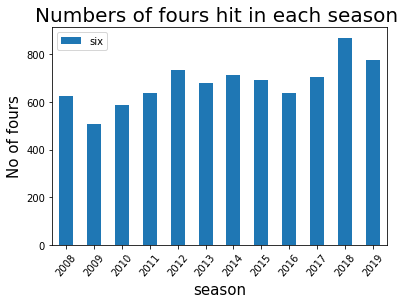

In [103]:
# we will plot graph on no of six hit in each season
ax=six_data.groupby('season')['batsman_runs'].agg([('six','count')]).reset_index().plot('season','six',kind='bar')
plt.title("Numbers of fours hit in each season ",fontsize=20)
plt.xticks(rotation=50)
plt.xlabel("season",fontsize=15)
plt.ylabel("No of fours",fontsize=15)
plt.show()

From above we can see that in season 2018 highest no of sixes were hitted by player.

In [104]:
# We will print the top 10 leading run scorer in IPL
batsman_score=Data.groupby('batsman')['batsman_runs'].agg(['sum']).reset_index().sort_values('sum',ascending=False).reset_index(drop=True)
batsman_score=batsman_score.rename(columns={'sum':'batsman_runs'})
print("*** Top 10 Leading Run Scorer in IPL ***")
batsman_score.iloc[:10,:]

*** Top 10 Leading Run Scorer in IPL ***


,batsman,batsman_runs
0,V Kohli,5434
1,SK Raina,5415
2,RG Sharma,4914
3,DA Warner,4741
4,S Dhawan,4632
5,CH Gayle,4560
6,MS Dhoni,4477
7,RV Uthappa,4446
8,AB de Villiers,4428
9,G Gambhir,4223


In [105]:
# we will print no of matches played by batsman
No_Matches_player= Data[["match_id","player_dismissed"]]
No_Matches_player =No_Matches_player .groupby("player_dismissed")["match_id"].count().reset_index().sort_values(by="match_id",ascending=False).reset_index(drop=True)
No_Matches_player.columns=["batsman","No_of Matches"]
No_Matches_player .head(5)

,batsman,No_of Matches
0,SK Raina,162
1,RG Sharma,155
2,RV Uthappa,153
3,V Kohli,143
4,S Dhawan,137


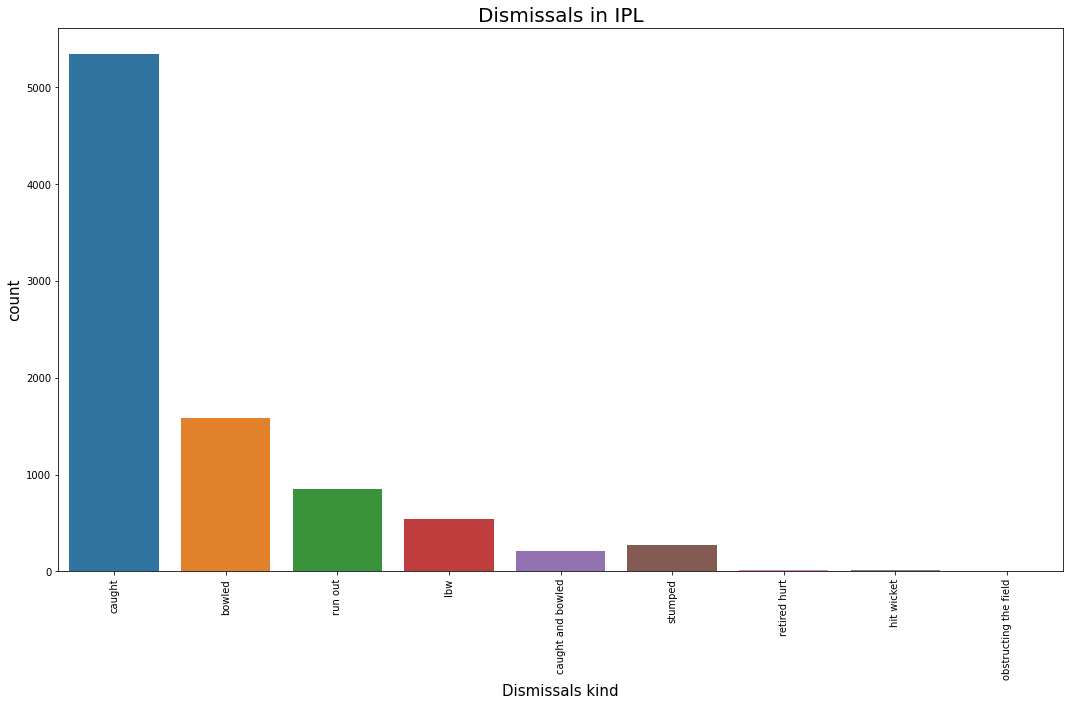

In [109]:
# Dismissals in IPL
plt.figure(figsize=(18,10))
ax=sns.countplot(Data.dismissal_kind)
plt.title("Dismissals in IPL",fontsize=20)
plt.xlabel("Dismissals kind",fontsize=15)
plt.ylabel("count",fontsize=15)
plt.xticks(rotation=90)
plt.show()

In [110]:
wicket_data=Data.dropna(subset=['dismissal_kind'])
wicket_data=wicket_data[~wicket_data['dismissal_kind'].isin(['run out','retired hurt','obstructing the field'])]

In [111]:
# we will print ipl most wicket taking bowlers
wicket_data.groupby('bowler')['dismissal_kind'].agg(['count']).reset_index().sort_values('count',ascending=False).reset_index(drop=True).iloc[:10,:]

,bowler,count
0,SL Malinga,170
1,A Mishra,156
2,Harbhajan Singh,150
3,PP Chawla,149
4,DJ Bravo,147
5,B Kumar,133
6,R Ashwin,125
7,SP Narine,122
8,UT Yadav,119
9,RA Jadeja,108


**Conclusion**

1. The highest number of match played in IPL season was 2013,2014,2015.
2. The highest number of match won by Mumbai Indians i.e 4 match out of 12 matches.
3. Teams which Bowl first has higher chances of winning then the team which bat first.
4. After winning toss more teams decide to do fielding first.
5. In finals teams which decide to do fielding first win the matches more then the team which bat first.
6. In finals most teams after winning toss decide to do fielding first.
7. Top player of match winning are CH gayle, AB de villers.
8. It is interesting that out of 12 IPL finals,9 times the team that won the toss was also the winner of IPL.
9. The highest number of four hit by player is Shikar Dhawan.
10. The highest number of six hit by player is CH gayle.
11. Top leading run scorer in IPL are Virat kholi, SK Raina, RG Sharma.
12. The highest number of matches played by player name are SK Raina, RG Sharma.
13. Dismissals in IPL was most by Catch out .
14. The IPL most wicket taken blower is SL Malinga. 